# WEEK 4

## Loading the data

Check if the missing values are presented in the features.
If there are missing values:
- For caterogiral features, replace them with 'NA'
- For numerical features, replace with with 0.0



In [79]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
import wget
import pandas as pd
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'
wget.download(data)
df = pd.read_csv('course_lead_scoring.csv')

100% [..............................................................................] 80876 / 80876

In [41]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [42]:
print(df.isnull().sum())


lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64


In [43]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index) 
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
 


In [44]:
categorical_columns

['lead_source', 'industry', 'employment_status', 'location']

In [45]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [46]:
null_data = df[df.isnull().any(axis=1)]
#null_data

In [47]:
df2=pd.DataFrame()

In [48]:
df['lead_source'].fillna('NA', inplace=True)

C:\Users\hanaa.hammad\AppData\Local\Temp\ipykernel_19448\3538553470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lead_source'].fillna('NA', inplace=True)


In [49]:
for c in categorical_columns:
    df[c].fillna('NA', inplace=True)

C:\Users\hanaa.hammad\AppData\Local\Temp\ipykernel_19448\2027781595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna('NA', inplace=True)


In [50]:
print(df.isnull().sum())


lead_source                   0
industry                      0
number_of_courses_viewed      0
annual_income               181
employment_status             0
location                      0
interaction_count             0
lead_score                    0
converted                     0
dtype: int64


In [51]:
df['annual_income'].fillna(  0.0, inplace=True)     

C:\Users\hanaa.hammad\AppData\Local\Temp\ipykernel_19448\1769733693.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['annual_income'].fillna(  0.0, inplace=True)


In [52]:
print(df.isnull().sum())


lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64



Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [53]:
df.shape, df.columns

((1462, 9),
 Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
        'employment_status', 'location', 'interaction_count', 'lead_score',
        'converted'],
       dtype='object'))

In [54]:
from sklearn.model_selection import train_test_split
import numpy as np

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
 
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values
 
del df_train['converted']
del df_val['converted']
del df_test['converted'] 

# Question 1: ROC AUC feature importance


In [ ]:

dv = DictVectorizer(sparse=False)
 
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
 
model = LogisticRegression()
model.fit(X_train, y_train)

In [40]:
categorical_columns
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [41]:
df.dtypes
numerical = ['number_of_courses_viewed', 'annual_income','interaction_count', 'lead_score']

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer


In [46]:
dv = DictVectorizer(sparse=False)
 
train_dict = df_train[categorical_columns + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
 
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\hanaa.hammad\AppData\Local\anaconda3\envs\ml-env\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:

val_dict = df_val[categorical_columns + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
 
y_pred = model.predict_proba(X_val)[:, 1]
converted_decision = (y_pred >= 0.5)
(y_val == converted_decision).mean()

np.float64(0.8020477815699659)

In [61]:
y_pred.shape, X_val.shape

((293,), (293, 31))

#### ROC

In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [68]:
df_test.shape

(293, 8)

In [70]:
 
test_dict = df_test[categorical_columns + numerical].to_dict(orient='records')
X_test = dv.fit_transform(test_dict)
 
X_test.shape

(293, 31)

In [71]:
X_train.shape

(876, 31)

In [72]:
y_test.shape

(293,)

In [73]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

#### PLOT the curve

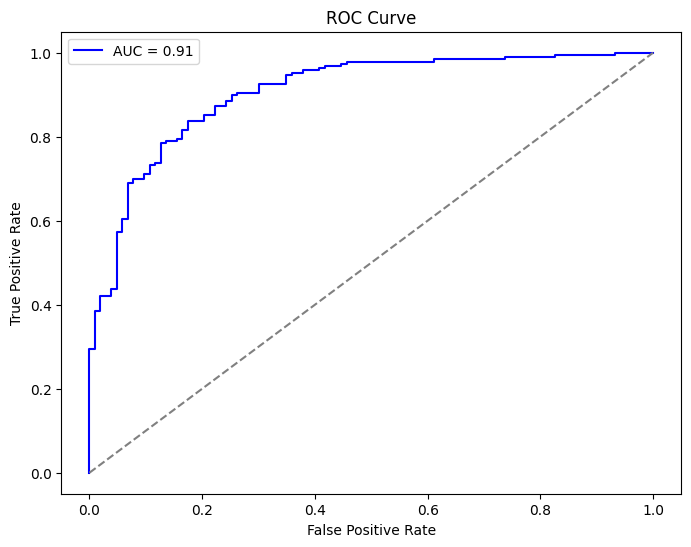

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import auc
# auc needs values for x-axis and y-axis
auc(fpr, tpr)
# Output: 0.843850505725819

0.9053653551354113

In [79]:
from sklearn.metrics import roc_auc_score
 
roc_auc_score(y_val, y_pred)

0.8899913718723037

In [81]:
y_val

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1])

### ROC and AUC

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['balance'])


AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.


Which numerical variable (among the following 4) has the highest AUC?

In [83]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [82]:
y_pred = model.predict_proba(X_val)[:, 1]
churn = y_pred >= 0.5
(churn == y_val).mean()

np.float64(0.8020477815699659)

In [84]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,171,122,0,0
10,0.1,170,101,1,21
20,0.2,166,80,5,42
30,0.3,164,68,7,54
40,0.4,157,48,14,74
50,0.5,152,39,19,83
60,0.6,144,26,27,96
70,0.7,130,14,41,108
80,0.8,110,10,61,112
90,0.9,82,4,89,118


In [85]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

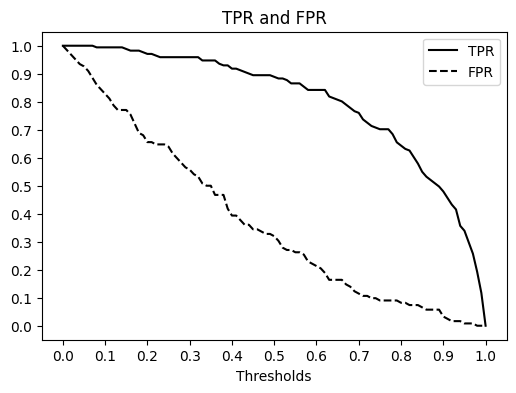

In [86]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

# Question 2: Training the model


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)


What's the AUC of this model on the validation dataset? (round to 3 digits)

### train the model

In [57]:
categorical =  categorical_columns
numerical = [ 'number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
df.columns, df.dtypes

(Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
        'employment_status', 'location', 'interaction_count', 'lead_score',
        'converted'],
       dtype='object'),
 lead_source                  object
 industry                     object
 number_of_courses_viewed      int64
 annual_income               float64
 employment_status            object
 location                     object
 interaction_count             int64
 lead_score                  float64
 converted                     int64
 dtype: object)

In [58]:
categorical , numerical

(['lead_source', 'industry', 'employment_status', 'location'],
 ['number_of_courses_viewed',
  'annual_income',
  'interaction_count',
  'lead_score'])

In [59]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [64]:
model =LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
#  LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [66]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

### ROC and AUC

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [68]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8171316268814112

In [70]:
from sklearn.metrics import roc_auc_score
round(roc_auc_score(y_val, y_pred), 3)

0.817

# Question 3: Precision and Recall


Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01

For each threshold, compute precision and recall

Plot them


In [71]:
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()

In [73]:
confusion_table = np.array(
     # predict neg    pos
    [[true_negative, false_positive], # actual neg
     [false_negative, true_positive]]) # actual pos

confusion_table, confusion_table / confusion_table.sum()

(array([[ 41,  81],
        [  7, 164]]),
 array([[0.13993174, 0.27645051],
        [0.02389078, 0.55972696]]))

In [74]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(np.float64(0.6693877551020408), np.float64(0.9590643274853801))

In [81]:
scores = []

thresholds = np.linspace(0, 1, 100)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

![image.png](attachment:a9dae57b-808f-4649-a61c-97c57daf96ad.png)

In [82]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [83]:
df_scores[::10]

,threshold,tp,fp,fn,tn,precision,recall
0,0.000000,171,122,0,0,0.583618,1.000000
10,0.101010,171,122,0,0,0.583618,1.000000
20,0.202020,171,122,0,0,0.583618,1.000000
30,0.303030,171,119,0,3,0.589655,1.000000
40,0.404040,170,105,1,17,0.618182,0.994152
50,0.505051,163,79,8,43,0.673554,0.953216
60,0.606061,149,51,22,71,0.745000,0.871345
70,0.707071,104,23,67,99,0.818898,0.608187
80,0.808081,63,6,108,116,0.913043,0.368421
90,0.909091,18,1,153,121,0.947368,0.105263


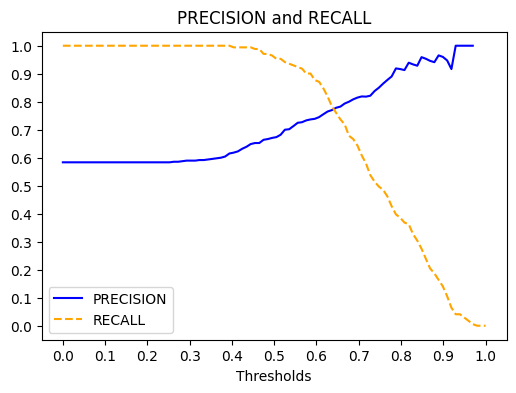

In [85]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.precision, color='blue', linestyle='solid', label='PRECISION')
plt.plot(df_scores.threshold, df_scores.recall, color='orange', linestyle='dashed', label='RECALL')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('PRECISION and RECALL')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

# Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:


In [122]:
scores = []

#thresholds = np.linspace(0, 1, 0.1)
thresholds = np.arange(0, 1.1, 0.01) 

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [123]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [124]:
df_scores['F1'] = (2 *(df_scores.precision *df_scores.recall))  / (df_scores.precision +df_scores.recall)

In [125]:
df_scores.iloc[][]

,threshold,tp,fp,fn,tn,precision,recall,F1
0,0.00,142,91,0,0,0.609442,1.0,0.757333
1,0.01,142,91,0,0,0.609442,1.0,0.757333
2,0.02,142,91,0,0,0.609442,1.0,0.757333
3,0.03,142,91,0,0,0.609442,1.0,0.757333
4,0.04,142,91,0,0,0.609442,1.0,0.757333
...,...,...,...,...,...,...,...,...
105,1.05,0,0,142,91,NaN,0.0,NaN
106,1.06,0,0,142,91,NaN,0.0,NaN
107,1.07,0,0,142,91,NaN,0.0,NaN
108,1.08,0,0,142,91,NaN,0.0,NaN


In [126]:
 df_scores.iloc[df_scores['F1'].idxmax()]

threshold      0.580000
tp           125.000000
fp            26.000000
fn            17.000000
tn            65.000000
precision      0.827815
recall         0.880282
F1             0.853242
Name: 58, dtype: float64

# Question 5: 5-Fold CV


Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

Iterate over different folds of df_full_train

Split the data into train and validation

Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

Use AUC to evaluate the model on validation


In [89]:
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [90]:
from sklearn.model_selection import KFold

In [91]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)


In [94]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)


In [101]:
from tqdm.auto import tqdm

C:\Users\hanaa.hammad\AppData\Local\anaconda3\envs\ml-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [102]:
aucs = []

for train_idx, val_idx in tqdm(kfold.split(df_train_full)):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.converted.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

5it [00:00, 27.81it/s]


In [98]:
np.array(aucs).round(3)

array([0.806, 0.871, 0.775, 0.802, 0.856])

In [99]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.822 ± 0.036


# Question 6: Hyperparameter Tuning


Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.000001, 0.001, 1]

Initialize KFold with the same parameters as previously

Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)

Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [103]:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)

    return dv, model

In [108]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in  [0.000001, 0.001, 1]:
    aucs = []

    for train_idx, val_idx in tqdm(kfold.split(df_train_full)):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

5it [00:00, 31.58it/s]


C=1e-06, auc = 0.560 ± 0.024


5it [00:00, 31.07it/s]


C=0.001, auc = 0.867 ± 0.029


5it [00:00, 33.36it/s]

C=1, auc = 0.822 ± 0.036
